In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time, warnings
import datetime as dt

# Data Understanding

Okay, in this time we will segmentation the customer using RFM analisys and K-Means clustering. First I will tell the data.
here I have some data that I found from kaggle.com and here the resources : https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset
the data has Atribute InvoceeNo, StockCode, Description, Quantity, UnitPrice, CustomerID, and Country.
Data Dictionary : <br>
- InvoiceNo : number code of the transacation
- StockCode : the code of item
- Description : dthe description of item
- Quantity : count of item buying.
- InvoiceDate : date of customers transcation full with the time.
- UnitPrice : the price per item.
- Country : country of customers live.

In [2]:
#load datasets
df = pd.read_excel('OnlineRetail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#total rows and columns
df.shape


(541909, 8)

In [6]:
#check unique value for each columns
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
#check value counts in country columns
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

# Data Cleansing

In [8]:
#check total of missing value
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#to define Description and fill on Description Nan value
dftemp = df[df['Description'].notna()]
stockc = dftemp.drop_duplicates('StockCode')
stockc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
509369,579297,85179a,GREEN BITTY LIGHT CHAIN,1,2011-11-29 11:23:00,2.46,NaN,United Kingdom
512588,579512,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2,2011-11-29 16:47:00,2.91,NaN,United Kingdom
527065,580691,90214U,"LETTER ""U"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom
537224,581238,47591b,SCOTTIES CHILDRENS APRON,1,2011-12-08 10:53:00,4.13,NaN,United Kingdom


In [10]:
#chcek
cekdoang = df[df['InvoiceNo']==581238]
cekdoang.CustomerID.value_counts()

Series([], Name: CustomerID, dtype: int64)

In [11]:
#check null on stockc
stockc.isna().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1256
Country           0
dtype: int64

In [12]:
#define variable 
iss = ['StockCode','Description']
#define dataframe to create dict
stockc = stockc[iss]
#create dictionary
stockc = dict(zip(stockc.StockCode, stockc.Description))
stockc


{'85123A': 'WHITE HANGING HEART T-LIGHT HOLDER',
 71053: 'WHITE METAL LANTERN',
 '84406B': 'CREAM CUPID HEARTS COAT HANGER',
 '84029G': 'KNITTED UNION FLAG HOT WATER BOTTLE',
 '84029E': 'RED WOOLLY HOTTIE WHITE HEART.',
 22752: 'SET 7 BABUSHKA NESTING BOXES',
 21730: 'GLASS STAR FROSTED T-LIGHT HOLDER',
 22633: 'HAND WARMER UNION JACK',
 22632: 'HAND WARMER RED POLKA DOT',
 84879: 'ASSORTED COLOUR BIRD ORNAMENT',
 22745: "POPPY'S PLAYHOUSE BEDROOM ",
 22748: "POPPY'S PLAYHOUSE KITCHEN",
 22749: 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 22310: 'IVORY KNITTED MUG COSY ',
 84969: 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 22623: 'BOX OF VINTAGE JIGSAW BLOCKS ',
 22622: 'BOX OF VINTAGE ALPHABET BLOCKS',
 21754: 'HOME BUILDING BLOCK WORD',
 21755: 'LOVE BUILDING BLOCK WORD',
 21777: 'RECIPE BOX WITH METAL HEART',
 48187: 'DOORMAT NEW ENGLAND',
 22960: 'JAM MAKING SET WITH JARS',
 22913: 'RED COAT RACK PARIS FASHION',
 22912: 'YELLOW COAT RACK PARIS FASHION',
 22914: 'BLUE COAT RACK PARIS FASHION',


In [13]:
#fill stokc on Nan in Description Column
df['Description'] = df['StockCode'].apply(lambda x: stockc.get(x))

In [14]:
#check again isna on df datframe
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

but in description still has nan value, we will check first

In [15]:
#cek again nan values in desription
nandes = df[df['Description'].isna()]
nandes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2026,536554,84670,None,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,None,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom
281615,561555,37477B,None,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom
281616,561557,37477C,None,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom
346849,567207,35592T,None,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom


In [16]:
#recheck
df[df['InvoiceNo']==536554]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2026,536554,84670,None,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom


there are anomaly

In [17]:
#check in description nan values and in UnitPrice column
nandes.UnitPrice.value_counts()

0.0    112
Name: UnitPrice, dtype: int64

we have to drop it because there are 0 values in unit price and customerID is Null

In [18]:
#drop NaN value in Description Column Only
df.dropna(subset=['Description'], inplace=True)
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134968
Country             0
dtype: int64

and now no missing value, then handling missing value in CustumerID columns 

In [19]:
#split nan value to dataframe then we'll define NaN value in CustomerID with InoiceNo
dfisna = df[df['CustomerID'].isna()]
dfisna

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


first of all we'll drop NaN value from df dataframe

In [20]:
#split dataframe which susbet nan value and notna
df = df.dropna()

In [21]:
#check
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
df.shape

(406829, 8)

In [23]:
#define value to fill CustomerID
det = dfisna['InvoiceNo']

#fill into CustomerID
dfisna['CustomerID'] = det

#check nan again in dfisna
dfisna.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

and then we have to concat the dataframe

In [24]:
#concat dataframe
df = pd.concat([df, dfisna])
#check nan value again
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [25]:
df.shape

(541797, 8)

In [26]:
#check anomaly in quantity
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,BELLE JARDINIERE CUSHION COVER,-26,2011-12-07 18:36:00,0.00,581210,United Kingdom
535335,581212,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-1050,2011-12-07 18:38:00,0.00,581212,United Kingdom
535336,581213,22576,SWALLOW WOODEN CHRISTMAS DECORATION,-30,2011-12-07 18:38:00,0.00,581213,United Kingdom
536908,581226,23090,VINTAGE GLASS T-LIGHT HOLDER,-338,2011-12-08 09:56:00,0.00,581226,United Kingdom


In [41]:
#check anomaly in UnitPrice
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,581234,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,581406,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,581406,United Kingdom
538554,581408,85175,CACTI T-LIGHT CANDLES,20,2011-12-08 14:06:00,0.0,581408,United Kingdom


In [38]:
df[df['CustomerID']==581422]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
538919,581422,23169,CLASSIC GLASS SWEET JAR,-235,2011-12-08 15:24:00,0.0,581422,United Kingdom


there are anomaly where UnitPrice is 0

In [36]:
#recheck
kos = df[df['UnitPrice']==0]
kos.shape

(2403, 8)

In [32]:
#recheck
df[df['StockCode']=='D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom


In [29]:
#define datafram on Quality columns is more than 0
# df = df[df['Quantity']>0]
df.shape

(541797, 8)

In [42]:
df = df[df['UnitPrice']!=0]
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [43]:
df.shape

(539394, 8)

# Data Preparation

In [44]:
#define total income ( qty x UnitPrice)
df['TotalTrx'] = df['Quantity'] * df['UnitPrice']

#split date
df['invDate']  = pd.DatetimeIndex(df['InvoiceDate']).date
#split date to year only
df['year'] = df['InvoiceDate'].dt.year
#split date to month only
df['month'] = df['InvoiceDate'].dt.month
#split date to day only
df['day'] = df['InvoiceDate'].dt.day
#split date to hour only
df['hour'] = df['InvoiceDate'].dt.hour
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8


In [63]:
#grouping by Invoice numb and Customer ID
dfgroups = df.groupby(['CustomerID','InvoiceNo','StockCode']).agg(
    totalqty = ('Quantity','sum'),
    totaltrx = ('TotalTrx','sum')
).reset_index()
dfgroups

,CustomerID,InvoiceNo,StockCode,totalqty,totaltrx
0,12346.0,541431,23166,74215,77183.60
1,12346.0,C541433,23166,-74215,-77183.60
2,12347.0,537626,20780,12,55.80
3,12347.0,537626,20782,6,32.94
4,12347.0,537626,21064,6,35.70
...,...,...,...,...,...
528738,C578097,C578097,84029E,-48,-180.00
528739,C579757,C579757,47469,-24,-15.60
528740,C579907,C579907,22169,-2,-15.30
528741,C580604,C580604,AMAZONFEE,-1,-11586.50


In [65]:
#recheck
dfgroups[dfgroups['StockCode']=='AMAZONFEE']

,CustomerID,InvoiceNo,StockCode,totalqty,totaltrx
400752,537632,537632,AMAZONFEE,1,13541.33
438579,547901,547901,AMAZONFEE,1,219.76
528432,C537600,C537600,AMAZONFEE,-1,-1.00
528435,C537630,C537630,AMAZONFEE,-1,-13541.33
528436,C537644,C537644,AMAZONFEE,-1,-13474.79
528437,C537647,C537647,AMAZONFEE,-1,-5519.25
528438,C537651,C537651,AMAZONFEE,-1,-13541.33
528439,C537652,C537652,AMAZONFEE,-1,-6706.71
528447,C540117,C540117,AMAZONFEE,-1,-16888.02
528448,C540118,C540118,AMAZONFEE,-1,-16453.71


In [57]:
#recheck
dfgroups[dfgroups['CustomerID']==12346]

,CustomerID,InvoiceNo,totalqty,totaltrx
0,12346.0,541431,74215,77183.6
1,12346.0,C541433,-74215,-77183.6


there are 2 assumption, customer has canceled the order or human error from the employee

In [58]:
#check on main dataframe
df[df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-18,2011,1,18,10
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,2011-01-18,2011,1,18,10


I think customer has canceled the order. we have to drop it

In [169]:
#we have to grouping by CustomerID only to drop canceled order
dfgroups = df.groupby(['CustomerID']).agg(
    totalqty = ('Quantity','sum'),
    totaltrx = ('TotalTrx','sum')
).reset_index()
dfgroups

,CustomerID,totalqty,totaltrx
0,12347.0,2458,4310.00
1,12348.0,2341,1797.24
2,12349.0,631,1757.55
3,12350.0,197,334.40
4,12352.0,470,1545.41
...,...,...,...
5976,C578097,-324,-1208.04
5977,C579757,-24,-15.60
5978,C579907,-2,-15.30
5979,C580604,-1,-11586.50


In [68]:
#check anomaly again
dfgroups[dfgroups['totaltrx']<0]

,CustomerID,totalqty,totaltrx
125,12503.0,-1,-1126.00
127,12505.0,-1,-4.50
212,12605.0,-4,-7.50
264,12666.0,-56,-227.44
415,12870.0,-2,-14.90
...,...,...,...
5978,C578097,-324,-1208.04
5979,C579757,-24,-15.60
5980,C579907,-2,-15.30
5981,C580604,-1,-11586.50


In [69]:
#recheck
dfgroups[dfgroups['CustomerID']=='C580604']

,CustomerID,totalqty,totaltrx
5981,C580604,-1,-11586.5


In [75]:
#recheck
dfgroups[dfgroups['totaltrx']==11586.5]

,CustomerID,totalqty,totaltrx


I think that's anomaly, we have to drop it

In [607]:
#define dfgroups from data which totaltrx is higher than 0
dfgroups = dfgroups[dfgroups['totaltrx']>0]
dfgroups

,CustomerID,totalqty,totaltrx


<AxesSubplot:xlabel='totaltrx', ylabel='totalqty'>

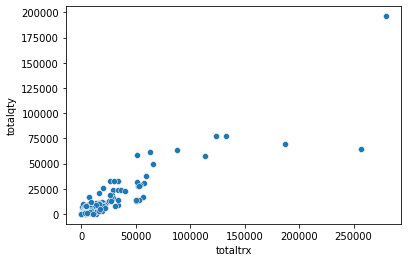

In [165]:
#scaterplot of totaltrx and totalqty from dfgroups datafrme
sns.scatterplot(data=dfgroups, x = 'totaltrx', y = 'totalqty')

<AxesSubplot:xlabel='totaltrx'>

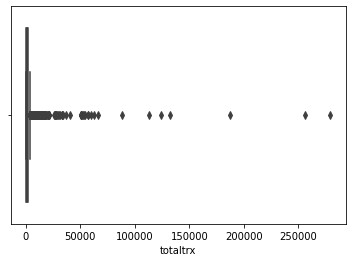

In [167]:
sns.boxplot(data=dfgroups, x = 'totaltrx')

In [170]:
dfgroups[dfgroups['totaltrx']>150000]

,CustomerID,totalqty,totaltrx
1701,14646.0,196143,279489.02
3755,17450.0,69029,187482.17
4230,18102.0,64122,256438.49


In [173]:
df[df['CustomerID']==18102.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date
16425,537657,82484,WOOD BLACK BOARD ANT WHITE FINISH,408,2010-12-07 16:42:00,4.78,18102.0,United Kingdom,1950.24,2010-12-07,2010,12,7,16,"[5, 3, 7, 6, 5, 7]",2010-12-07
16426,537657,22830,UTILTY CABINET WITH HOOKS,30,2010-12-07 16:42:00,19.84,18102.0,United Kingdom,595.20,2010-12-07,2010,12,7,16,"[5, 3, 7, 6, 5, 7]",2010-12-07
16427,537657,22189,CREAM HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,2245.32,2010-12-07,2010,12,7,16,"[5, 3, 7, 6, 5, 7]",2010-12-07
16428,537657,22188,BLACK HEART CARD HOLDER,972,2010-12-07 16:42:00,2.31,18102.0,United Kingdom,2245.32,2010-12-07,2010,12,7,16,"[5, 3, 7, 6, 5, 7]",2010-12-07
16429,537657,21623,VINTAGE UNION JACK MEMOBOARD,408,2010-12-07 16:42:00,6.38,18102.0,United Kingdom,2603.04,2010-12-07,2010,12,7,16,"[5, 3, 7, 6, 5, 7]",2010-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540066,581457,23535,BICYCLE SAFTEY WALL ART,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,491.40,2011-12-08,2011,12,8,18,"[5, 8, 1, 4, 5, 7]",2011-12-08
540067,581457,23530,WALL ART ONLY ONE PERSON,126,2011-12-08 18:43:00,3.57,18102.0,United Kingdom,449.82,2011-12-08,2011,12,8,18,"[5, 8, 1, 4, 5, 7]",2011-12-08
540068,581457,23526,DOG LICENCE WALL ART,126,2011-12-08 18:43:00,3.90,18102.0,United Kingdom,491.40,2011-12-08,2011,12,8,18,"[5, 8, 1, 4, 5, 7]",2011-12-08
540069,581457,23401,RUSTIC MIRROR WITH LACE HEART,126,2011-12-08 18:43:00,4.15,18102.0,United Kingdom,522.90,2011-12-08,2011,12,8,18,"[5, 8, 1, 4, 5, 7]",2011-12-08


In [164]:
df[df['StockCode']=='D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010-12-01,2010,12,1,9,"[5, 3, 6, 3, 7, 9]",2010-12-01
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,-29.29,2010-12-05,2010,12,5,13,"[5, 3, 7, 1, 6, 4]",2010-12-05
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,-281.00,2010-12-07,2010,12,7,12,"[5, 3, 7, 5, 9, 7]",2010-12-07
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,-267.12,2010-12-08,2010,12,8,16,"[5, 3, 7, 8, 5, 7]",2010-12-08
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76,2010-12-15,2010,12,15,9,"[5, 3, 8, 8, 9, 7]",2010-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,-19.82,2011-11-18,2011,11,18,12,"[5, 7, 7, 2, 2, 7]",2011-11-18
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,-16.76,2011-11-18,2011,11,18,12,"[5, 7, 7, 2, 2, 7]",2011-11-18
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,-26.33,2011-11-23,2011,11,23,12,"[5, 7, 8, 2, 3, 9]",2011-11-23
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,-20.53,2011-11-30,2011,11,30,17,"[5, 7, 9, 8, 8, 4]",2011-11-30


In [124]:
df[df['TotalTrx']==11062.06]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,A563185,United Kingdom,11062.06,2011-08-12,2011,8,12,14


In [126]:
df.nunique()

InvoiceNo      23793
StockCode       3937
Description     3805
Quantity         506
InvoiceDate    21799
UnitPrice       1629
CustomerID      5981
Country           38
TotalTrx        6199
invDate          305
year               2
month             12
day               31
hour              15
dtype: int64

In [79]:
dfgroups.describe()

,totalqty,totaltrx
count,5750.000000,5.750000e+03
mean,924.395304,1.751056e+03
std,4094.209296,7.294382e+03
min,0.000000,1.776357e-15
25%,101.000000,2.359750e+02
50%,310.000000,6.231950e+02
75%,788.000000,1.620283e+03
max,196143.000000,2.794890e+05


<AxesSubplot:ylabel='totalqty'>

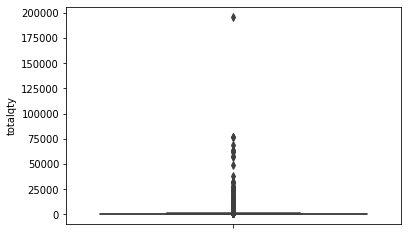

In [80]:
sns.boxplot(data=dfgroups, y = 'totalqty')

In [163]:
dfgroups[dfgroups['totalqty']>175000]

,CustomerID,totalqty,totaltrx
1702,14646.0,196143,279489.02


In [87]:
loyal = df[df['CustomerID']==14646]
loyal

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,3.48,2010-12-20,2010,12,20,10
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,2010-12-20 10:09:00,0.29,14646.0,Netherlands,3.48,2010-12-20,2010,12,20,10
37954,539491,22720,SET OF 3 CAKE TINS PANTRY DESIGN,2,2010-12-20 10:09:00,4.95,14646.0,Netherlands,9.90,2010-12-20,2010,12,20,10
37955,539491,21931,JUMBO STORAGE BAG SUKI,1,2010-12-20 10:09:00,1.95,14646.0,Netherlands,1.95,2010-12-20,2010,12,20,10
37956,539491,22613,PACK OF 20 SPACEBOY NAPKINS,2,2010-12-20 10:09:00,0.85,14646.0,Netherlands,1.70,2010-12-20,2010,12,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534958,581176,22908,PACK OF 20 NAPKINS RED APPLES,96,2011-12-07 15:19:00,0.72,14646.0,Netherlands,69.12,2011-12-07,2011,12,7,15
534959,581176,22907,PACK OF 20 NAPKINS PANTRY DESIGN,96,2011-12-07 15:19:00,0.72,14646.0,Netherlands,69.12,2011-12-07,2011,12,7,15
534960,581176,22029,SPACEBOY BIRTHDAY CARD,72,2011-12-07 15:19:00,0.36,14646.0,Netherlands,25.92,2011-12-07,2011,12,7,15
534961,581176,22712,CARD DOLLY GIRL,72,2011-12-07 15:19:00,0.36,14646.0,Netherlands,25.92,2011-12-07,2011,12,7,15


In [88]:
loyal.groupby(['CustomerID']).agg(
totalqty = ('Quantity','sum'))

,totalqty
CustomerID,
14646.0,196143


In [140]:
loyal[loyal['TotalTrx']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour
84389,C543388,POST,POSTAGE,-3,2011-02-08 09:44:00,15.00,14646.0,Netherlands,-45.0,2011-02-08,2011,2,8,9
304662,C563593,D,Discount,-1,2011-08-18 06:13:00,206.40,14646.0,Netherlands,-206.4,2011-08-18,2011,8,18,6
319804,C564899,M,Manual,-480,2011-08-31 11:31:00,0.22,14646.0,Netherlands,-105.6,2011-08-31,2011,8,31,11
319805,C564899,22956,36 FOIL HEART CAKE CASES,-144,2011-08-31 11:31:00,1.85,14646.0,Netherlands,-266.4,2011-08-31,2011,8,31,11
319806,C564899,21787,RAIN PONCHO RETROSPOT,-144,2011-08-31 11:31:00,0.65,14646.0,Netherlands,-93.6,2011-08-31,2011,8,31,11


In [93]:
#len of rows and columns.
df.shape

(539394, 14)

In [ ]:
#count amount of transaction per item
# df['count'] = df['Quantity'] * df['UnitPrice']

In [94]:
val = ['Quantity','UnitPrice','TotalTrx']

In [ ]:
# df = df[df['year']==2011]

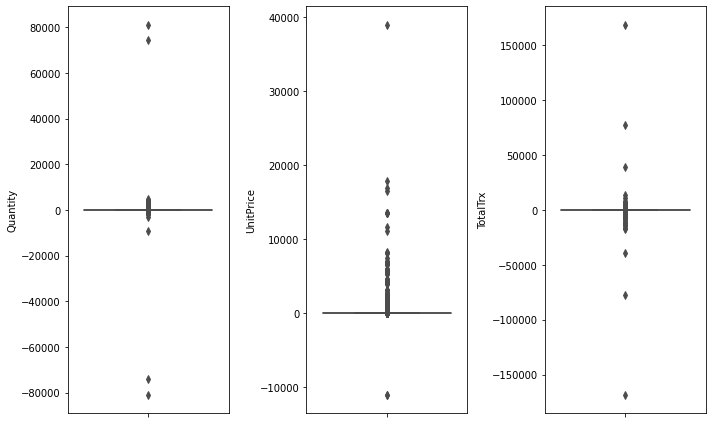

In [95]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
# plotting
features = val
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[val[i]], color='yellow')
    plt.tight_layout()


In [ ]:
# # def check_outlier(data, column):
# def check_outlier(data, column):
#     q1 = data[column].quantile(0.25)
#     q3 = data[column].quantile(0.75)
#     iqr = q3 - q1
    
#     return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
#                                  else 'not-outlier' for x in data[column].values]


In [137]:
df[ (df['CustomerID']==17548.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-39.60,2010-12-01,2010,12,1,10,"[5, 3, 6, 3, 9, 1]"
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom,30.00,2011-04-20,2011,4,20,12,"[5, 5, 0, 7, 5, 5]"
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,16.50,2011-04-20,2011,4,20,12,"[5, 5, 0, 7, 5, 5]"
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom,16.50,2011-04-20,2011,4,20,12,"[5, 5, 0, 7, 5, 5]"


In [138]:
lik = df[ (df['CustomerID']==17548.0)]
lik.groupby('CustomerID').agg(
tot= ('TotalTrx','sum'))

,tot
CustomerID,
17548.0,-141.48


In [107]:
df = df[(df['CustomerID']!=12346.0) & (df['CustomerID']!=16446.0)]


In [131]:
import re
df['InvoiceNumb'] =  [re.findall('[0-9]', str(x)) for x in df['InvoiceNo']]

In [132]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]"
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,581498,United Kingdom,20.65,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]"
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,581498,United Kingdom,16.52,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]"
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,581498,United Kingdom,4.96,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]"
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,581498,United Kingdom,10.79,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]"


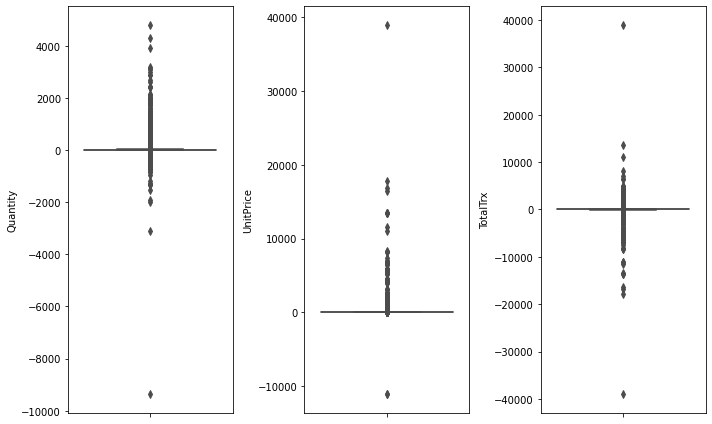

In [108]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
# plotting
features = val
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[val[i]], color='yellow')
    plt.tight_layout()


In [176]:
df[ (df['Quantity']<-8000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8,2010-12-02,2010,12,2,14,"[5, 3, 6, 7, 5, 7]",2010-12-02


In [118]:
df[ (df['CustomerID']==15838) & (df['StockCode']==84347) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,-280.8,2010-12-02,2010,12,2,14


In [ ]:
# def kelas for grouping total spent to handling outlier
def kelas(data, column):
    q1 = data[column].quantile(0.25)
    q2 = data[column].median()
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return [1 if x <= q1 else
            2 if x > q1 and x <= q2 else
            3 if x > q2 and x <= q3 else
            4 for x in data[column].values]

In [ ]:
df['class_totalspent'] = kelas(data=df, column='count')

In [ ]:
kelas4 = df[df['class_totalspent']==4]

In [ ]:
kelas4.sort_values(by=['count'], ascending=False)

In [ ]:
df.class_totalspent.value_counts()

In [ ]:

sns.histplot(data=df, x='class_totalspent', color='yellow')


In [ ]:
df[(df['Quantity']>0) &  (df['Quantity']<=3) ]

In [ ]:
df[(df['Quantity']>0)& (df['Quantity']<2)&  (df['UnitPrice']>=10) ]

In [ ]:
df.Quantity.describe()

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(10,6))
# plotting
features = val
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df1[val[i]], color='yellow')
    plt.tight_layout()

# RFM Analysis
I got references from https://clevertap.com/blog/rfm-analysis/ to set RFM score

In [177]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01


In [ ]:
df.head(2)

In [178]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12347.0,2011-12-07
1,12348.0,2011-09-25
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03


In [179]:
#last date available in our dataset
df['date'].max()

datetime.date(2011, 12, 9)

last transaction in the dataset is in 2011-12-09, we will use the date to the last trancation.

In [180]:
lasttransall = dt.date(2011,12,9)
print(lasttransall)

2011-12-09


## Recency

In [181]:
#calculate recency
recency_df['recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (lasttransall - x).days)

In [182]:
#drop LastPurchaseDate columns
recency_df.drop(columns='LastPurchaseDate', inplace=True)
recency_df.head(2)

,CustomerID,recency
0,12347.0,2
1,12348.0,75


## Frequency

In [183]:
#calculate frequency of purchases
frequency_df = df.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','frequency']
frequency_df.head()

,CustomerID,frequency
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,95


## Monetary

In [184]:
#grouping totaltrx aggregate by sum 
monetary_df = df.groupby(by='CustomerID',as_index=False).agg({'TotalTrx': 'sum'})
monetary_df.columns = ['CustomerID','monetary']
monetary_df.head()

,CustomerID,monetary
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1545.41


In [185]:
#merging rfm data
rfm_df = pd.merge(recency_df, frequency_df, on="CustomerID")

In [186]:
#merging rfm data
rfm_df = pd.merge(rfm_df, monetary_df, on="CustomerID")

In [187]:
rfm_df.head()

,CustomerID,recency,frequency,monetary
0,12347.0,2,182,4310.00
1,12348.0,75,31,1797.24
2,12349.0,18,73,1757.55
3,12350.0,310,17,334.40
4,12352.0,36,95,1545.41


In [188]:
rfm_df.describe()

,recency,frequency,monetary
count,5981.000000,5981.000000,5981.000000
mean,118.594048,90.183581,1629.785159
std,112.430413,210.315295,7203.438909
min,0.000000,1.000000,-17836.460000
25%,22.000000,12.000000,201.190000
50%,73.000000,38.000000,589.150000
75%,204.000000,103.000000,1550.850000
max,373.000000,7983.000000,279489.020000


In [217]:
# fin = ['rscore','fscore','mscore']
# rfm_df = rfm_df[fin]
rfm_df = rfm_df[rfm_df['monetary']>0]
rfm_df

,CustomerID,recency,frequency,monetary,rscore,fscore,mscore,cluster
0,12347.0,2,182,4310.00,4,4,4,0
1,12348.0,75,31,1797.24,2,2,4,3
2,12349.0,18,73,1757.55,4,3,4,0
3,12350.0,310,17,334.40,1,2,2,1
4,12352.0,36,95,1545.41,3,3,3,0
...,...,...,...,...,...,...,...,...
5792,581439,1,635,6637.59,4,4,4,0
5793,581492,0,731,7689.23,4,4,4,0
5794,581497,0,59,3217.20,4,3,4,0
5795,581498,0,218,5664.89,4,4,4,0


## Visualization

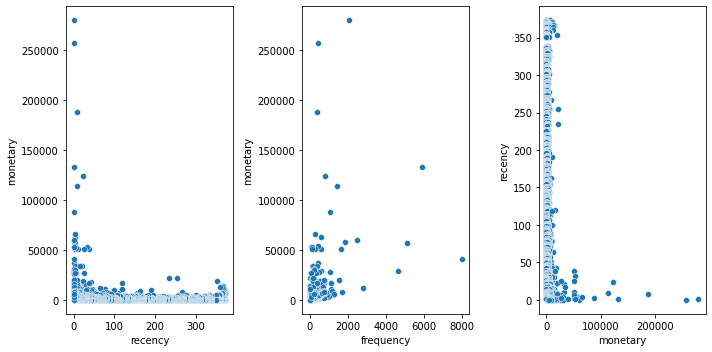

In [218]:
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.scatterplot(ax=axes[0],data=rfm_df,x='recency', y='monetary')
sns.scatterplot(ax=axes[1],data=rfm_df,x='frequency', y='monetary')
sns.scatterplot(ax=axes[2],data=rfm_df,y='recency', x='monetary')
plt.tight_layout()

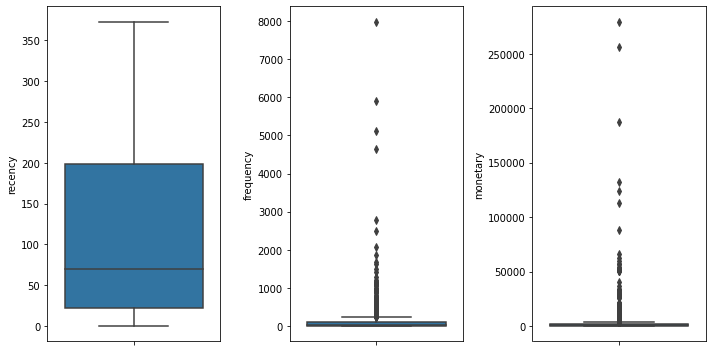

In [219]:
#boxplot for outlier check
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.boxplot(ax=axes[0],data=rfm_df,y='recency')
sns.boxplot(ax=axes[1],data=rfm_df,y='frequency')
sns.boxplot(ax=axes[2],data=rfm_df,y='monetary')
plt.tight_layout()

In [221]:
# def quantile for scoring rfm(data, column):
def quantile(data, column):
    q1 = data[column].quantile(0.25)
    q2 = data[column].median()
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return [1 if x <= q1 else
            2 if x > q1 and x <= q2 else
            3 if x > q2 and x <= q3 else
            4 for x in data[column].values]

# def quantile for scoring rfm(data, column):
def quantile_recency(data, column):
    q1 = data[column].quantile(0.25)
    q2 = data[column].median()
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return [4 if x <= q1 else
            3 if x > q1 and x <= q2 else
            2 if x > q2 and x <= q3 else
            1 for x in data[column].values]

In [309]:
#scoring on recency score
rfm_df['rscore'] = quantile(data=rfm_df, column='recency')
#scoring on frequency score
rfm_df['fscore'] = quantile(data=rfm_df, column='frequency')
#scoring on monetary score
rfm_df['mscore'] = quantile(data=rfm_df, column='monetary')

In [311]:
fin = ['rscore','fscore','mscore']
rfm = rfm_df[fin]

In [312]:
rfm

,rscore,fscore,mscore
0,1,4,4
1,3,2,4
2,1,3,4
3,4,2,2
4,2,3,3
...,...,...,...
5792,1,4,4
5793,1,4,4
5794,1,3,4
5795,1,4,4


# Segmentation with K-Means Clustering

<AxesSubplot:>

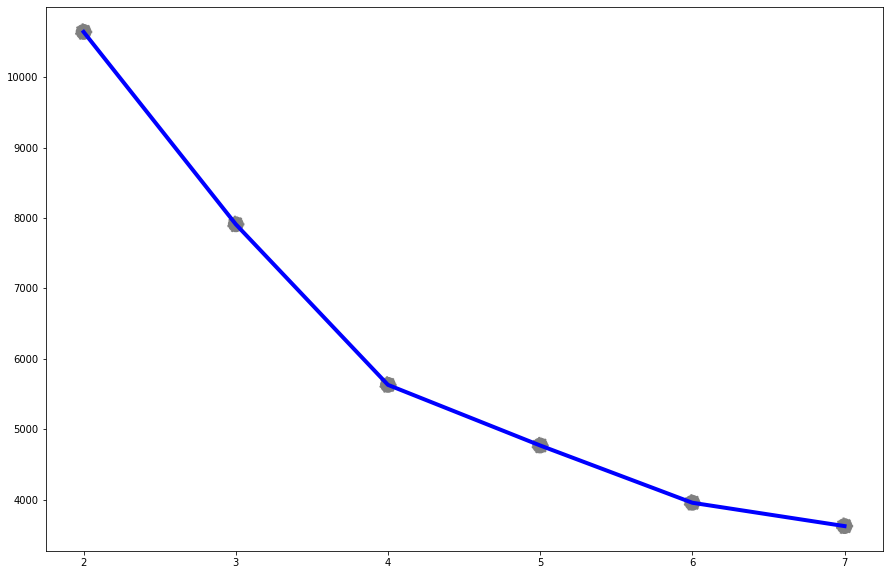

In [313]:
#import Kmeans 
from sklearn.cluster import KMeans
inertia = []

#find potential K from data
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(rfm.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))

sns.lineplot(x=range(2, 8), y=inertia, color='blue', linewidth = 4)
sns.scatterplot(x=range(2, 8), y=inertia, s=300, color='grey',  linestyle='--')

we have K=4 which potential K

In [314]:
#showing value of Inertia 
inertia = pd.DataFrame(inertia)
inertia

,0
0,10644.568513
1,7911.739149
2,5630.324722
3,4769.202297
4,3955.599818
5,3624.186704


In [201]:
from sklearn.metrics import silhouette_score


In [315]:
#define value of cluster for finding K using Sillhoute score
range_n_clusters = list(range(2,8))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7]


In [316]:
#define empty list for append score
arr_silhouette_score_euclidean = []
#looping for finding n cluster
for i in range_n_clusters:
    
    kmeans = KMeans(n_clusters=i).fit(rfm)
    preds = kmeans.predict(rfm)
    
    score_euclidean = silhouette_score(rfm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

In [317]:
#showing sillhoute score
arr_silhouette_score_euclidean

[0.4364399074424189,
 0.3990260676689954,
 0.4202943524350401,
 0.4086885407712246,
 0.41377623244042744,
 0.417943568808956]

<AxesSubplot:>

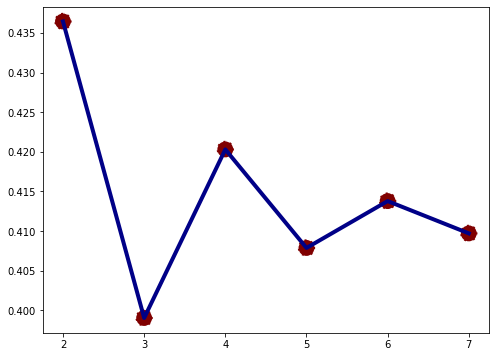

In [230]:
#visualization of sillhoute score
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,8), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,8), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

we have 2 potential value from sillhoure score, distance methode with euclidean distance and we got n = 2 and n 4 which potential, but we'll take 4 because in inertia we got 4 too.

In [318]:
#define ncluster = 4 and fit dataframe
kmeans = KMeans(n_clusters=4).fit(rfm)
#predicting
preds = kmeans.predict(rfm)

In [349]:
#add predicting columns into rfm dataframe
rfm_df['cluster'] = preds

In [350]:
clust1 = rfm_df[rfm_df['cluster']==0]
clust2 = rfm_df[rfm_df['cluster']==1]
clust3 = rfm_df[rfm_df['cluster']==2]
clust4 = rfm_df[rfm_df['cluster']==3]
clust1.head()

,CustomerID,recency,frequency,monetary,rscore,fscore,mscore,cluster,desc
3,12350.0,310,17,334.4,4,2,2,0,Churned best Customers
5,12353.0,204,4,89.0,4,1,1,0,Churned best Customers
7,12355.0,214,13,459.4,4,1,2,0,Churned best Customers
13,12361.0,287,10,189.9,4,1,1,0,Churned best Customers
15,12363.0,109,23,552.0,3,2,2,0,Churned best Customers


<AxesSubplot:xlabel='monetary'>

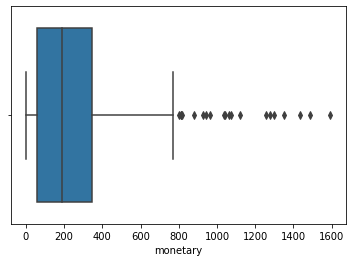

In [321]:
#visualization
sns.boxplot(data=clust1, x = 'monetary')

<AxesSubplot:xlabel='rscore', ylabel='fscore'>

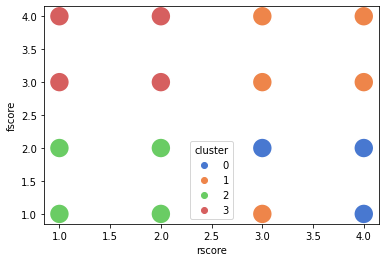

In [367]:
sns.scatterplot(data=rfm_df, y = 'fscore', x = 'rscore', hue='cluster', palette="muted", s=400)

<AxesSubplot:xlabel='rscore', ylabel='mscore'>

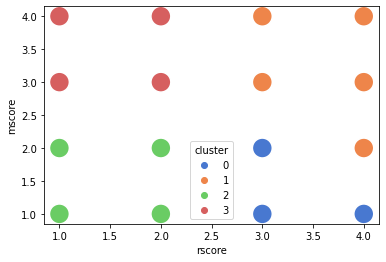

In [366]:
sns.scatterplot(data=rfm_df, y = 'mscore', x = 'rscore', hue='cluster', palette="muted", s=400)

<AxesSubplot:xlabel='fscore', ylabel='mscore'>

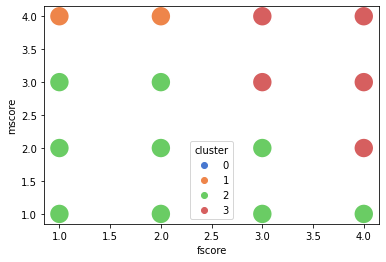

In [365]:
sns.scatterplot(data=rfm_df, y = 'mscore', x = 'fscore', hue='cluster', palette="muted", s=400)

In [325]:
#adding description for each clusters references https://www.optimove.com/resources/learning-center/rfm-segmentation
map_class = {3:'Best Customers',
             2:'high-spending new Customers',
             1:'lowest-spending active Customers',
             0:'Churned best Customers'
            }
rfm_df['desc'] = rfm_df['cluster'].map(map_class)
dd = ['recency','frequency','monetary','cluster']
rfm_check = rfm_df[dd]

In [336]:
clust4.describe()

,recency,frequency,monetary,rscore,fscore,mscore,cluster
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.0
mean,21.238067,207.978520,4319.114320,1.387828,3.572196,3.597852,3.0
std,18.478483,354.440232,13029.337931,0.487400,0.536581,0.523451,0.0
min,0.000000,17.000000,272.440000,1.000000,2.000000,2.000000,3.0
25%,7.000000,77.000000,1195.637500,1.000000,3.000000,3.000000,3.0
50%,16.000000,130.000000,2057.440000,1.000000,4.000000,4.000000,3.0
75%,32.000000,236.000000,3759.387500,2.000000,4.000000,4.000000,3.0
max,70.000000,7983.000000,279489.020000,2.000000,4.000000,4.000000,3.0


In [334]:
mmx = [clust1,clust2,clust3,clust4]

In [351]:
minmax = []
for mimax in mmx:
    c = mimax.min()
    b = mimax.max()
#     minmax.append(c)
#     minmax.append(b)
    print('Min Transaction')
    print(c)
    print('\n')
    print('Max Transaction')
    print(b)
    print('\n')
print(minmax)

Min Transaction
CustomerID                   12350.0
recency                           71
frequency                          1
monetary                         0.0
rscore                             3
fscore                             1
mscore                             1
cluster                            0
desc          Churned best Customers
dtype: object


Max Transaction
CustomerID                    568914
recency                          373
frequency                         88
monetary                     1592.49
rscore                             4
fscore                             3
mscore                             3
cluster                            0
desc          Churned best Customers
dtype: object


Min Transaction
recency                                 71
frequency                                1
monetary                            237.07
rscore                                   3
fscore                                   1
mscore                                 

C:\Users\yodia\AppData\Local\Temp\ipykernel_13284\1479119994.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  c = mimax.min()
C:\Users\yodia\AppData\Local\Temp\ipykernel_13284\1479119994.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  b = mimax.max()


In [603]:
rfm_df[rfm_df['cluster']==0]

,CustomerID,recency,frequency,monetary,rscore,fscore,mscore,cluster,desc
3,12350.0,310,17,334.40,4,2,2,0,Churned best Customers
5,12353.0,204,4,89.00,4,1,1,0,Churned best Customers
7,12355.0,214,13,459.40,4,1,2,0,Churned best Customers
13,12361.0,287,10,189.90,4,1,1,0,Churned best Customers
15,12363.0,109,23,552.00,3,2,2,0,Churned best Customers
...,...,...,...,...,...,...,...,...,...
5518,568514,73,1,1.36,3,1,1,0,Churned best Customers
5519,568565,73,8,19.85,3,1,1,0,Churned best Customers
5521,568691,72,1,16.50,3,1,1,0,Churned best Customers
5522,568693,72,21,100.37,3,2,1,0,Churned best Customers


# Filling Cluster into Dataframe

In [368]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01


In [381]:
temp = rfm_df[['CustomerID','cluster']].reset_index(drop=True)
temp

,CustomerID,cluster
0,12347.0,3
1,12348.0,1
2,12349.0,3
3,12350.0,0
4,12352.0,3
...,...,...
5744,581439,3
5745,581492,3
5746,581497,3
5747,581498,3


In [386]:
#define cluster from dataframe to dictionary
temp1 = temp.set_index('CustomerID')['cluster'].to_dict()

In [398]:
# df['cluster'] = rfm_df['CustomerID'].apply(temp1)
df['cluster'] = df['CustomerID'].apply(lambda x: temp1.get(x,x))

In [399]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010,12,1,8,"[5, 3, 6, 3, 6, 5]",2010-12-01,1


In [ ]:
#check 
rfm_df[rfm_df['CustomerID']==13313.0]

In [400]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalTrx       0
invDate        0
year           0
month          0
day            0
hour           0
InvoiceNumb    0
date           0
cluster        0
dtype: int64

# Giving Rating From Order

In [584]:

df['rating'] = [1 if x<0 or y < 0 else
                1.5 if (x>0 and x<=1 and y <= 10 and y > 0) else
                2 if (x>0 and x<=2 and y <= 10 and y > 0) else
                2.5 if (x>0 and x<=3 and y <= 10 and y > 0) else
                3 if (x>0 and x <=4 and y <= 10 and y > 0) else
                3.5 if (x>0 and x<=5 and y <= 10 and y > 0) else
                4 if (x>0 and x <= 10  and y >0 ) else
                4.5 if (x>10 and x <= 20 and y < 50) else 
                5 if (x>20  or y > 20) 
                else 'none' for x,y in zip(df['Quantity'], df['UnitPrice'])]

In [598]:
af = np.arange(1,5.5,0.5)

for z in af:
    dd = df[df['rating']==z]
    print('Min Transaction in Rating',z,'is',dd.TotalTrx.min())
    print('Max Transaction in Rating',z,'is',dd.TotalTrx.max(),'\n')

Min Transaction in Rating 1.0 is -38970.0
Max Transaction in Rating 1.0 is -0.12 

Min Transaction in Rating 1.5 is 0.001
Max Transaction in Rating 1.5 is 10.0 

Min Transaction in Rating 2.0 is 0.12
Max Transaction in Rating 2.0 is 20.0 

Min Transaction in Rating 2.5 is 0.36
Max Transaction in Rating 2.5 is 29.880000000000003 

Min Transaction in Rating 3.0 is 0.32
Max Transaction in Rating 3.0 is 39.92 

Min Transaction in Rating 3.5 is 0.3
Max Transaction in Rating 3.5 is 49.75 

Min Transaction in Rating 4.0 is 0.36
Max Transaction in Rating 4.0 is 13541.33 

Min Transaction in Rating 4.5 is 0.78
Max Transaction in Rating 4.5 is 699.0 

Min Transaction in Rating 5.0 is 1.26
Max Transaction in Rating 5.0 is 38970.0 



In [585]:
df.rating.value_counts()

1.5    132843
4.0    103421
2.0     77048
4.5     75438
5.0     56807
3.0     37355
2.5     35734
3.5     11454
1.0      9288
Name: rating, dtype: int64

In [587]:
df[df['rating']==1.5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTrx,invDate,year,month,day,hour,InvoiceNumb,date,cluster,rating
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,1.25,2010-12-01,2010,12,1,9,"[5, 3, 6, 3, 8, 1]",2010-12-01,3,1.5
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311.0,United Kingdom,0.85,2010-12-01,2010,12,1,9,"[5, 3, 6, 3, 8, 1]",2010-12-01,3,1.5
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311.0,United Kingdom,2.55,2010-12-01,2010,12,1,9,"[5, 3, 6, 3, 8, 1]",2010-12-01,3,1.5
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311.0,United Kingdom,1.95,2010-12-01,2010,12,1,9,"[5, 3, 6, 3, 8, 1]",2010-12-01,3,1.5
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom,2.95,2010-12-01,2010,12,1,9,"[5, 3, 6, 3, 8, 1]",2010-12-01,3,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541525,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,2011-12-09 10:26:00,5.79,581498,United Kingdom,5.79,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]",2011-12-09,3,1.5
541528,581498,84970s,HANGING HEART ZINC T-LIGHT HOLDER,1,2011-12-09 10:26:00,2.08,581498,United Kingdom,2.08,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]",2011-12-09,3,1.5
541531,581498,84997d,PINK 3 PIECE POLKADOT CUTLERY SET,1,2011-12-09 10:26:00,8.29,581498,United Kingdom,8.29,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]",2011-12-09,3,1.5
541532,581498,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1,2011-12-09 10:26:00,4.13,581498,United Kingdom,4.13,2011-12-09,2011,12,9,10,"[5, 8, 1, 4, 9, 8]",2011-12-09,3,1.5


# Product Recommendation Collaborative Filtering

In [592]:
# Aggregate by Stock Code
agg_ratings = df.groupby('StockCode').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()
# Keep the product with over 100 ratings
agg_rating_over100 = agg_ratings[agg_ratings['number_of_ratings']>100]

# Check the information of the dataframe
agg_rating_over100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1559 entries, 4 to 3929
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StockCode          1559 non-null   object 
 1   mean_rating        1559 non-null   float64
 2   number_of_ratings  1559 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 48.7+ KB


In [593]:
# Check popular product
agg_rating_over100.sort_values(by='number_of_ratings', ascending=False).head()

,StockCode,mean_rating,number_of_ratings
3552,85123A,3.515171,2307
1238,22423,3.861465,2198
3541,85099B,3.468228,2156
2472,47566,3.364716,1726
100,20725,3.259304,1639


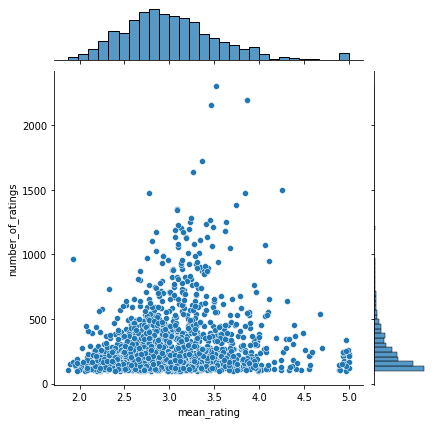

In [594]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_rating_over100)

In [596]:
agg_rating_over100.mean_rating.min()

1.8761904761904762

In [605]:
piv_ratings = df.pivot_table(index='CustomerID',columns='StockCode', values='rating')
piv_ratings.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [609]:
#normalize user-item matrix
matrix_norm = piv_ratings.subtract(piv_ratings.mean(axis=True),axis='rows')
matrix_norm.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.931818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.116438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.441176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.930085,NaN,0.569915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [610]:
#user similarity using pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

CustomerID,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,12357.0,...,C577342,C577343,C577346,C577348,C577779,C578097,C579757,C579907,C580604,C580605
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,1.000000,NaN,0.980196,NaN,0.755929,NaN,1.0,0.829156,0.333870,0.264971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,0.980196,NaN,1.000000,1.0,0.861122,NaN,1.0,NaN,0.285714,-0.061337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12352.0,0.755929,NaN,0.861122,NaN,1.000000,NaN,1.0,NaN,-0.770963,-0.189581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [615]:
#user similarity using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.02396289,  0.00854942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02396289,  1.        , -0.01442977, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00854942, -0.01442977,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#export data to csv
df1.to_csv('cleaned_df.csv')
rfm_df.to_csv('cust_seg.csv')